## Homework 8

### 1. Можно ли отобрать наиболее значимые признаки с помощью PCA?

В методе главных компонент признаки не рассматриваются в разрезе целевой переменной, определяется их линейная взаимосвязь друг с другом и наиболее коррелирующие могут без особенной потери в информации быть "схлопнуты", а "значимость" обычно предполагает именно зависимость целевой переменной от конкретного признака, так что логичный ответ - нет. "Значимые" для целевой переменной признаки могут как сильно коррелировать с другими, так и не коррелировать вовсе, так метод главных компонент для определения наиболее значимых признаков неэффективен.

### 2. (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [31]:
def StandartScaler(X):
    # центрирование - вычитание из каждого значения среднего по признаку
    means = X_.mean(axis=0)
    for i in range(rows):
        for j in range(cols):
            X_[i, j] -= means[j]

    # деление каждого значения на стандартное отклонение
    std = np.std(X_, axis=0)
    for j in range(cols):
        for i in range(rows):
            X_[i, j] /= std[j]
    
    return X_

In [97]:
def PCA_SVD(X, n_components, log=False):
    # Для начала отмасштабируем выборку
    X_ = X.astype(float)

    rows, cols = X_.shape
    
    X_ = StandartScaler(X_)
            
    # разложим матрицу X_
    U, D, VT = np.linalg.svd(X_)
    
    # Найдем собственные векторы и собственные значения
    eig_values, eig_vectors = D, VT.T

    # сформируем список кортежей (собственное значение, собственный вектор)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

    # и отсортируем список по убыванию собственных значений
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    if log == True:
        eig_sum = sum(eig_values)
        var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)
        print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

        # а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
        print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')
    
    # Сформируем вектор весов из собственных векторов
    W = VT.T[:,:n_components]
    
    return X_.dot(W)

In [102]:
X_new = PCA_SVD(X, n_components=2, log=True)
X_new

Доля дисперсии, описываемая каждой из компонент 
[53.52971788236239, 29.956812784020087, 12.003682417209491, 4.509786916408035]
Кумулятивная доля дисперсии по компонентам 
[ 53.52971788  83.48653067  95.49021308 100.        ]


array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

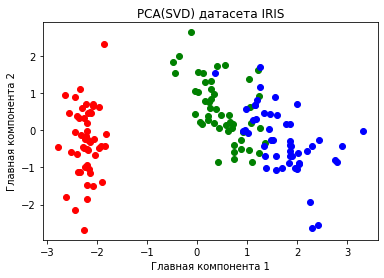

In [103]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_new[y==i, 0], X_new[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA(SVD) датасета IRIS')
plt.show()

### 3. (*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [104]:
# до применения PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

1.0

In [105]:
# после применения PCA
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_new, y, test_size=0.2, random_state=42)
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)

model2.fit(X_train_PCA, y_train_PCA)
y_pred_PCA = model2.predict(X_test_PCA)
f1_score(y_test_PCA, y_pred_PCA, average='weighted')

0.89923273657289

Качество немного упало.